# Fashion Mnist: Image Classification

Using TensorFlow backend.


4423680/4422102 [==============================] - 3s 1us/step
1
8


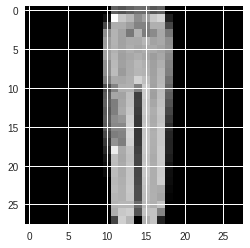

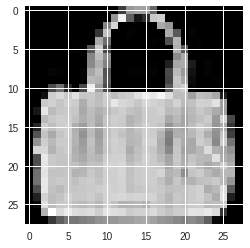

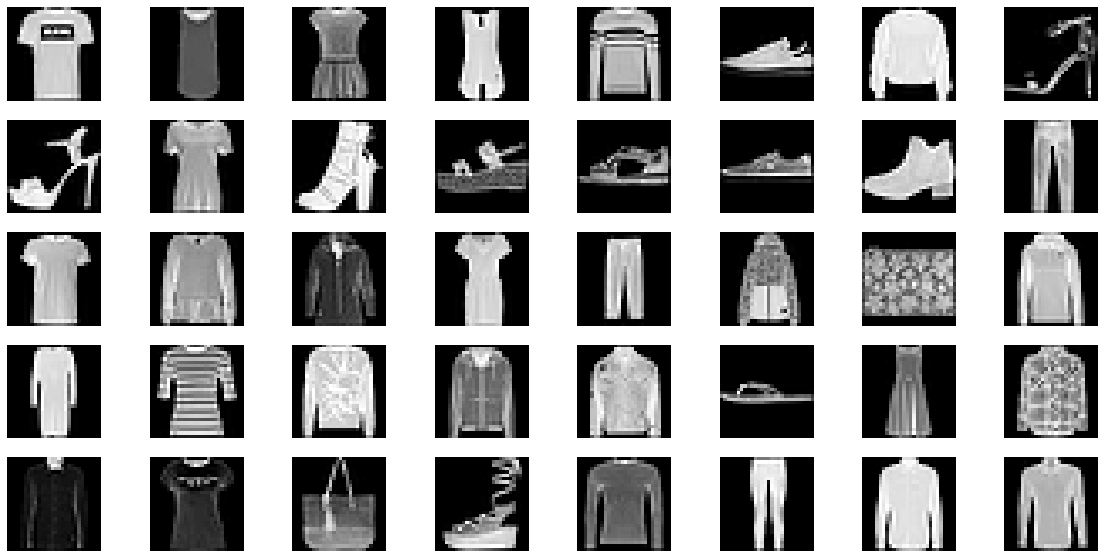

In [1]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from keras.optimizers import SGD
import matplotlib.pyplot as plt
%matplotlib inline
batch_size = 128
num_classes = 10
epochs = 20

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print (y_train[1000])
fig= plt.figure()
plt.imshow(x_train[1000], cmap='gray')

print (y_train[4000])
fig= plt.figure()
plt.imshow(x_train[4000], cmap='gray')


fig= plt.figure(figsize=(20,10))
for i in range (1,41):
    ax1 = fig.add_subplot(5,8,i)
    plt.xticks([], [])
    plt.yticks([], [])
    ax1.imshow(x_train[i], cmap='gray')
 

Label	Description
* 0	T-shirt
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

In [2]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


60000 train samples
10000 test samples


In [0]:
def train_model(model):
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

In [4]:
model0 = Sequential()
model0.add(Dense(1, activation='sigmoid', input_shape=(784,)))
model0.add(Dense(num_classes, activation='softmax'))
model0.summary()
model0.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])
train_model(model0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 785       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 58us/step - loss: 2.2661 - acc: 0.1014 - val_loss: 2.2294 - val_acc: 0.1203
Epoch 2/20
60000/60000 [==============================] - 3s 42us/step - loss: 2.1994 - acc: 0.1639 - val_loss: 2.1718 - val_acc: 0.1784
Epoch 3/20
30464/60000 [==============>...............] - ETA: 1s - loss: 2.1583 - acc: 0.183260000/60000 [==============================] - 3s 42us/step - loss: 2.1453 - acc: 0.1880 - val_loss: 2.1210 - val_acc: 0.1

# Single layer with 10 units

In [5]:
model1 = Sequential()
model1.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model1.add(Dense(num_classes, activation='softmax'))
model1.summary()
model1.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])
train_model(model1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 44us/step - loss: 2.1004 - acc: 0.3003 - val_loss: 1.9258 - val_acc: 0.4561
Epoch 2/20
60000/60000 [==============================] - 2s 42us/step - loss: 1.7989 - acc: 0.5198 - val_loss: 1.6827 - val_acc: 0.5650
Epoch 3/20
32000/60000 [===============>..............] - ETA: 1s - loss: 1.6285 - acc: 0.584360000/60000 [==============================] - 2s 41us/step - loss: 1.5872 - acc: 0.5979 - val_loss: 1.5022 - val_acc:

# Single Layer with more units

In [6]:
model2 = Sequential()
model2.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()
model2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
train_model(model2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.5878 - acc: 0.7911 - val_loss: 0.4708 - val_acc: 0.8318
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.4273 - acc: 0.8450 - val_loss: 0.4765 - val_acc: 0.8164
Epoch 3/20
12800/60000 [=====>........................] - ETA: 2s - loss: 0.4044 - acc: 0.852760000/60000 [==============================] - 3s 48us/step - loss: 0.3880 - acc: 0.8580 - val_loss: 0.4203 - val_

# Multiple Layers Without dropout

In [7]:
model3 = Sequential()
model3.add(Dense(512, activation='relu', input_shape=(784,)))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))
model3.summary()
model3.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
train_model(model3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.5346 - acc: 0.8057 - val_loss: 0.4839 - val_acc: 0.8272
Epoch 2/20
45952/60000 [=====================>........] - ETA: 0s - loss: 0.3802 - acc: 0.860260000/60000 [==============================] - 3s 55us/step - loss: 0.3737 - acc: 0.8627 - val_loss: 0.3727 - val_acc: 

# Multiple Layers With dropout

In [8]:
model4 = Sequential()
model4.add(Dense(512, activation='relu', input_shape=(784,)))
model4.add(Dropout(0.2))
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(num_classes, activation='softmax'))
model4.summary()
model4.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
train_model(model4)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.5581 

# Convolutional with final dense layer

In [10]:
#Data Preparation
from keras import backend as K


img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


#Model Building


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.5634 - acc: 0.8012 - val_loss: 0.3689 - val_acc: 0.8679
Epoch 2/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.3599 - acc: 0.8714 - val_loss: 0.3100 - val_acc: 0.8887
Epoch 3/20
 1280/60000 [..............................] - ETA: 10s - loss: 0.2757 - acc: 0.898460000/60000 [==============================] - 11s 181us/step - loss: 0.3091 - acc: 0.8893 - val_loss: 0.2870 - val_acc: 0.8972
Epoch 4/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.2796 - acc: 0.8989 - val_loss: 0.2616 - val_acc: 0.9062
Epoch 5/20
49792/60000 [=======================>......] - ETA: 1s - loss: 0.2522 - acc: 0.908160000/60000 [==============================] - 11s 179us/step - loss: 0.2535 - acc: 0.9079 - val_loss: 0.2474 - val_acc: 0.9099
Epoch 6/20
6000